# **Red Neuronal sigmoid para hallar %CCR**

### SVR y PLS

Aplicando una red neuronal (no aplicable, no se desarrollo)

## **Importe Librerias**


In [1]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 
import openpyxl
import sklearn
from sklearn.preprocessing import Normalizer # Normalizacion de datos


#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression



#Librerias Metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
###############################################
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import cross_val_score


#Graficas
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

In [2]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiendo de Datos**

In [3]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe

print(dt_Supp_spect.shape)
print("#"*62)
print(dt_Supp_spect.dtypes)
print("#"*62)
dt_Supp_spect.head() #print dt frame

(59692, 41)
##############################################################
Molecules\Samples     object
CR1                  float64
CR2                  float64
CR3                  float64
CR4                  float64
CR5                  float64
CR6                  float64
CR7                  float64
CR8                  float64
CR9                  float64
CR10                 float64
CR11                 float64
CR12                 float64
CR13                 float64
CR14                 float64
CR15                 float64
CR16                 float64
CR17                 float64
CR18                 float64
CR19                 float64
CR20                 float64
CR21                 float64
VR1                  float64
VR2                  float64
VR3                  float64
VR4                  float64
VR5                  float64
VR6                  float64
VR7                  float64
VR8                  float64
VR9                  float64
VR10                 float

,Molecules\Samples,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dt_Supp_spect = dt_Supp_spect.drop(['Molecules\Samples'], axis=1)
dt_Supp_spect.head()

,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,15.985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,28.735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,41.754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,30.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,40.590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dt_Supp_spect_sin_zeros = dt_Supp_spect.replace(0, np.nan).dropna(how='all')
dt_Supp_spect_sin_zeros = dt_Supp_spect_sin_zeros.fillna(0)
dt_Supp_spect_sin_zeros

,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,15.985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,28.735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,41.754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,30.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,40.590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59687,0.000,0.000,0.000,0.000,0.000,1.506,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59688,0.000,0.000,0.000,0.000,0.000,2.188,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59689,0.000,0.000,0.000,0.000,0.000,0.000,2.299,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59690,0.000,0.000,0.000,0.000,0.000,0.000,2.354,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dt_Supp_spect_sin_zeros.shape

(55154, 40)

In [7]:
#Dataframe Supplementary_CCR_spectra transpose
dt_spec_Transpose = dt_Supp_spect_sin_zeros.transpose()
# dt_spec_cut = dt_spec_Transpose.drop(dt_spec_Transpose.index[[0]])
# print(dt_spec_cut.shape)
print(dt_spec_Transpose.shape)
dt_spec_Transpose.head(41)

(40, 55154)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,16.122,30.101,38.500,31.574,52.324,23.838,65.693,47.620,49.053,64.986,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR2,28.754,35.596,54.152,43.425,62.510,37.521,82.040,73.056,66.248,86.506,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR3,11.208,18.767,30.508,27.087,40.397,15.232,51.565,30.627,45.974,74.695,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR4,24.784,36.845,55.708,41.362,57.982,27.374,82.940,60.110,67.817,79.501,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR5,2.360,10.718,25.710,43.697,37.720,29.929,56.975,26.378,83.384,80.180,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR6,2.252,7.076,16.029,36.075,24.171,47.137,46.952,48.978,58.504,56.834,...,0.000,1.528,1.728,1.702,1.521,1.506,2.188,0.000,0.000,0.000
CR7,2.612,10.005,22.088,39.573,25.059,43.698,51.550,43.905,63.517,54.516,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.299,2.354,2.223
CR8,2.020,11.003,28.136,46.366,41.800,30.415,53.800,29.205,77.326,76.793,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR9,17.854,35.712,50.344,35.953,63.023,29.398,69.367,58.145,73.410,82.545,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR10,15.985,28.735,41.754,30.995,40.590,28.725,54.259,52.429,53.938,57.728,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [8]:
#import target 40 muestras (masas)(Crudos y Fondos/Vacios)
#Dataframe Supplementary_CCR_properties
dt_Supp_Prop = pd.read_csv('Data/Supplementary_CCR_properties.csv',sep=",", decimal=",") #import dtframe
print('shape: ',dt_Supp_Prop.shape)
print('#'*85)
print(dt_Supp_Prop.dtypes)
print('#'*85)
dt_Supp_Prop.head() #print dt frame

shape:  (40, 2)
#####################################################################################
Samples       object
CCR (wt%)    float64
dtype: object
#####################################################################################


,Samples,CCR (wt%)
0,CR1,12.94
1,CR2,4.34
2,CR3,9.67
3,CR4,7.03
4,CR5,17.84


# **Aplicacion Modelos ML**


In [9]:
print(dt_spec_Transpose.shape)
# dt_spec_cut.shape

(40, 55154)


In [10]:
#Definimos las moleculas como Features
dt_features= dt_spec_Transpose.to_numpy()  #Variables predictoras
#Definimos CCR% como Target
dt_target=dt_Supp_Prop['CCR (wt%)'].to_numpy()  #Variable Objetivo
#Normalizacion de datos
dt_features = Normalizer().fit_transform(dt_features) #Normalizar datos


In [11]:
print(dt_features)
print(dt_features.shape)

[[0.02323786 0.04338686 0.05549297 ... 0.         0.         0.        ]
 [0.02780996 0.03442732 0.0523741  ... 0.         0.         0.        ]
 [0.01984171 0.03322354 0.05400883 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(40, 55154)


In [12]:
print(dt_features.shape)

(40, 55154)


In [13]:
from keras import layers, models
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.2, random_state=42)

pca = PCA(n_components=8)  # Ajusta el número de componentes según sea necesario
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [16]:
# Crear el modelo
model = models.Sequential()

# Ajustar la entrada a la forma correcta
model.add(layers.Dense(30000, activation='relu', input_shape=(8,)))

model.add(layers.Dense(5000, activation='relu'))
model.add(layers.Dense(4000, activation='relu'))
model.add(layers.Dense(3000, activation='relu'))
model.add(layers.Dense(2000, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))

# Capa de salida para regresión
model.add(layers.Dense(1, activation='sigmoid')) #Sigmoid valores 0-1

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")



Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 386.4743 - mae: 16.8812 - val_loss: 240.1715 - val_mae: 14.7971
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 369.8424 - mae: 16.3812 - val_loss: 240.1715 - val_mae: 14.7971
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 369.8424 - mae: 16.3812 - val_loss: 240.1715 - val_mae: 14.7971
Epoch 4/100
1/1 [==============================] - 1s 850ms/step - loss: 369.8424 - mae: 16.3812 - val_loss: 240.1715 - val_mae: 14.7971
Epoch 5/100
1/1 [==============================] - 1s 850ms/step - loss: 369.8424 - mae: 16.3812 - val_loss: 240.1715 - val_mae: 14.7971
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 369.8423 - mae: 16.3812 - val_loss: 240.1715 - val_mae: 14.7971
Epoch 7/100
1/1 [==============================] - 1s 867ms/step - loss: 369.8424 - mae: 16.3812 - val_loss: 240.1715 - val_mae: 14.7971
Epoch 8/100
1/1 [==============================] - 1s

1/1 [==============================] - 0s 296ms/step


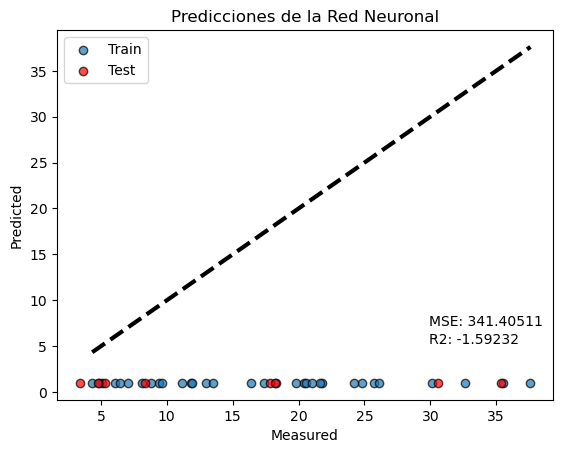

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones con el modelo
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calcular MSE y R2
MSE_NN = mean_squared_error(y_test, y_pred_test)
r2NN = r2_score(y_test, y_pred_test)

# Graficar los resultados
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Train', alpha=0.7)
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Test', alpha=0.7)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)

# Añadir textos para MSE y R2
plt.text(0.75, 0.2, f"MSE: {MSE_NN:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2NN:.5f}", transform=plt.gca().transAxes)

# Etiquetas de los ejes
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.legend()
plt.title('Predicciones de la Red Neuronal')
plt.show()


In [8]:
bestErrorSVR=[]
bestErrorPLS=[]
bestR2SVR=[]
bestR2PLS=[]
for i in range (1,1024):
    X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
    #Fit models
    modeloSVR.fit(X_train, y_train)
    modeloPLS.fit(X_train, y_train)
    
    #Predict Models
    prediccionesSVR = modeloSVR.predict(X_test)
    prediccionesPLS = modeloPLS.predict(X_test)
    
    #Error medio Cuadrado - Valor ideal 0
    MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
    MSE_PLS = mean_squared_error(y_test, prediccionesPLS)
    
    #Agregar Valores a la matriz
    bestErrorSVR.append(MSE_SVR) # Valor ideal 0
    bestErrorPLS.append(MSE_PLS) #Valor ideal 0
    
    #Error R2 - Valor ideal 1
    r2SVR= r2_score(y_test, prediccionesSVR)#Valor ideal 1
    r2PLS= r2_score(y_test, prediccionesPLS)#Valor ideal 1
    
    #Agregar valores a la matriz
    bestR2SVR.append(r2SVR)
    bestR2PLS.append(r2PLS)

In [9]:
print(len(bestErrorSVR))

1023


In [10]:
print(np.argmin(bestErrorSVR))
print(np.min(bestErrorSVR))
print(bestErrorSVR[671])

671
1.8230946311347396
1.8230946311347396


In [11]:
print(np.argmax(bestR2SVR))
print(np.max(bestR2SVR))

805
0.9781384975175741


In [39]:
#partir conjunto de entrenamiento


X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state =np.argmax(bestR2SVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

#============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)
print("prediccionesSVR",prediccionesSVR)
print("prediccionesPLS",prediccionesPLS)
print("y_test",y_test.shape,y_test)

#=====================================================


#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado PLS= ', MSE_LPS)

#====================================================
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)

print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)

prediccionesSVR [27.58279284  9.74921566 20.18551583  6.13797313 25.41080675  6.6803621
  9.2360122  24.85247759]
prediccionesPLS [[17.32868374]
 [11.89538445]
 [15.20653671]
 [11.66865081]
 [17.79023806]
 [11.746754  ]
 [11.33770735]
 [21.15070037]]
y_test (8,) [30.6   8.15 20.4   4.77 25.7   5.34  9.67 24.2 ]
ErrorMedioCuadrado SVR=  2.0090824281900277
ErrorMedioCuadrado PLS=  47.5511863428076
r2error SVR=  0.9781384975175741
r2error PLS=  0.482579528002689


## Graficas

In [40]:
#Grafico Resultados SVR

import matplotlib.pyplot as plt 
import seaborn as sns

y_pred=prediccionesPLS_train
y_pred_test=prediccionesPLS

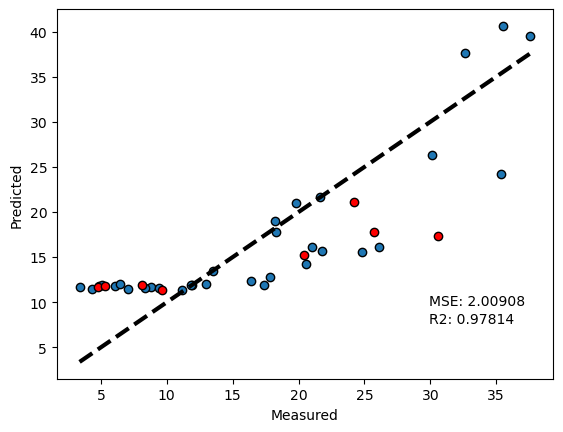

In [41]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {MSE_SVR:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2SVR:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [17]:
from joblib import dump
dump(modeloSVR, 'Regrecion%CCR_SVR.pkl')
 

['Regrecion%CCR_SVR.pkl']